In [1]:
# Data Clean Up
bodyfat_raw <- read.csv("BodyFat.csv")

In [2]:
head(bodyfat_raw)

IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,12.6,1.0708,23,154.25,67.75,23.7,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
2,6.9,1.0853,22,173.25,72.25,23.4,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
3,24.6,1.0414,22,154.00,66.25,24.7,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
4,10.9,1.0751,26,184.75,72.25,24.9,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
5,27.8,1.0340,24,184.25,71.25,25.6,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
6,20.6,1.0502,24,210.25,74.75,26.5,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8


In [3]:
bodyfat <- bodyfat_raw[,-c(1,3)]

In [4]:
head(bodyfat)

BODYFAT,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
12.6,23,154.25,67.75,23.7,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
6.9,22,173.25,72.25,23.4,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
24.6,22,154.00,66.25,24.7,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
10.9,26,184.75,72.25,24.9,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
27.8,24,184.25,71.25,25.6,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
20.6,24,210.25,74.75,26.5,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8


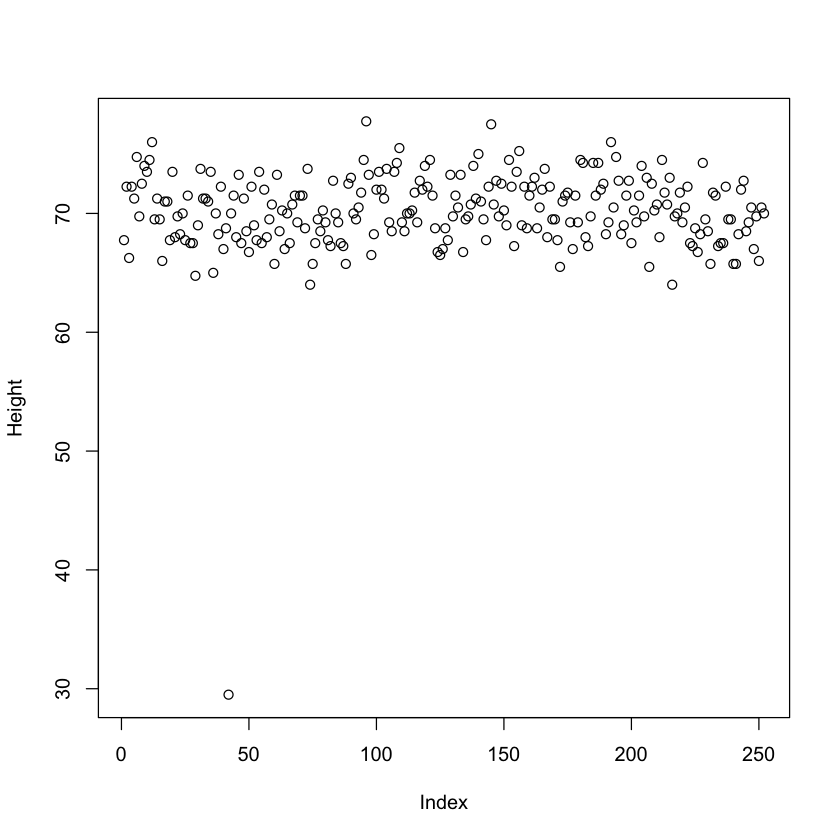

In [5]:
plot(bodyfat[,'HEIGHT'],ylab = 'Height')

In [6]:
which.min(bodyfat[,'HEIGHT'])

[1] 42

In [7]:
bodyfat[which.min(bodyfat[,'HEIGHT']),'HEIGHT']

[1] 29.5

In [8]:
bodyfat <- bodyfat[-42,]

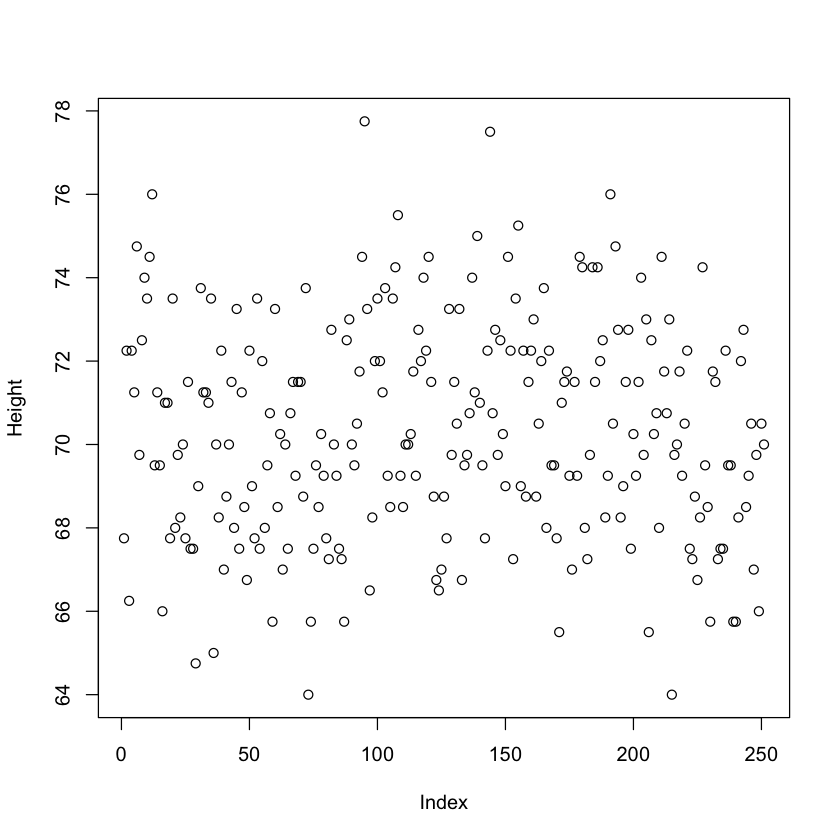

In [9]:
plot(bodyfat[,'HEIGHT'],ylab = 'Height')

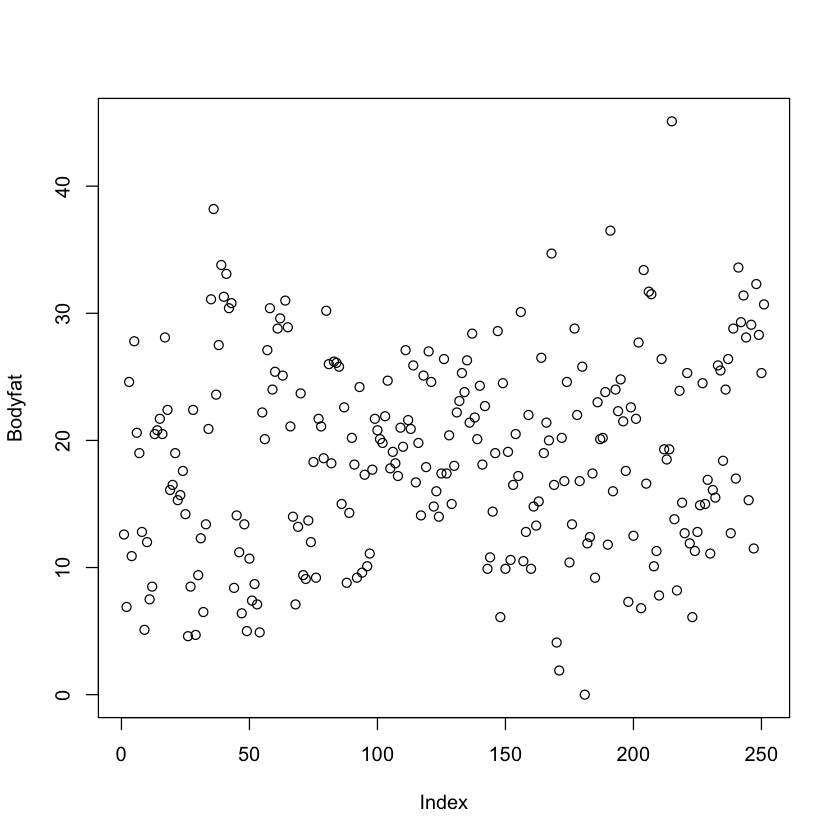

In [10]:
plot(bodyfat[,'BODYFAT'],ylab = 'Bodyfat')

In [11]:
which.min(bodyfat[,'BODYFAT'])

[1] 181

In [12]:
bodyfat[which.min(bodyfat[,'BODYFAT']),'BODYFAT']

[1] 0

In [13]:
which.max(bodyfat[,'BODYFAT'])

[1] 215

In [14]:
bodyfat[which.max(bodyfat[,'BODYFAT']),'BODYFAT']

[1] 45.1

In [15]:
bodyfat <- bodyfat[-c(which.min(bodyfat[,'BODYFAT']),which.max(bodyfat[,'BODYFAT'])),]

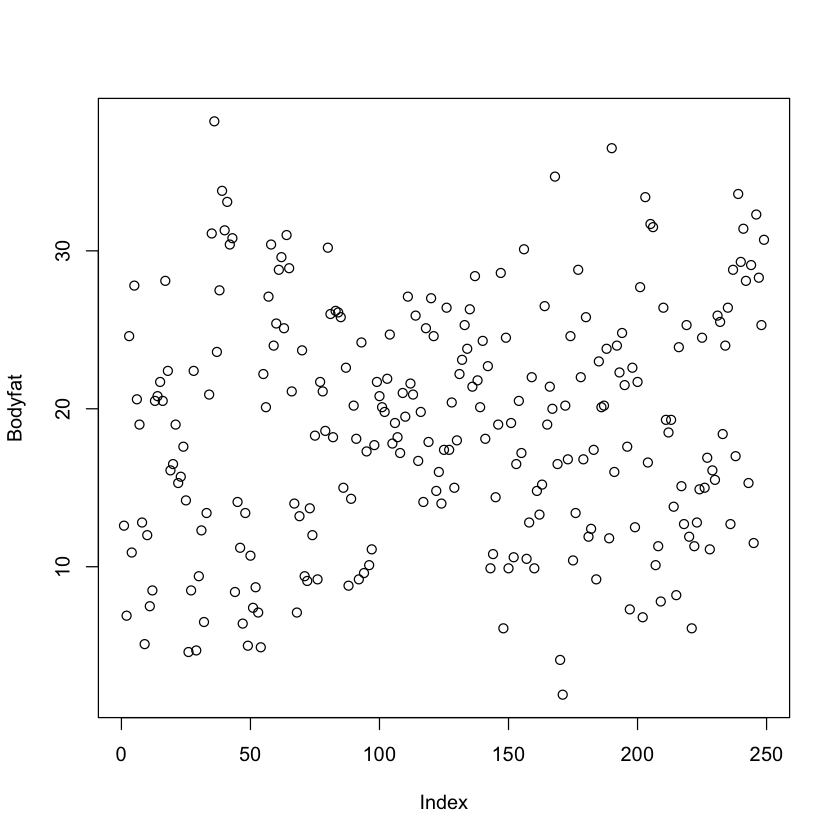

In [16]:
plot(bodyfat[,'BODYFAT'],ylab = 'Bodyfat')

In [17]:
which.min(bodyfat[,'BODYFAT'])

[1] 171

In [18]:
bodyfat[which.min(bodyfat[,'BODYFAT']),'BODYFAT']

[1] 1.9

In [19]:
bodyfat <- bodyfat[-which.min(bodyfat[,'BODYFAT']),]

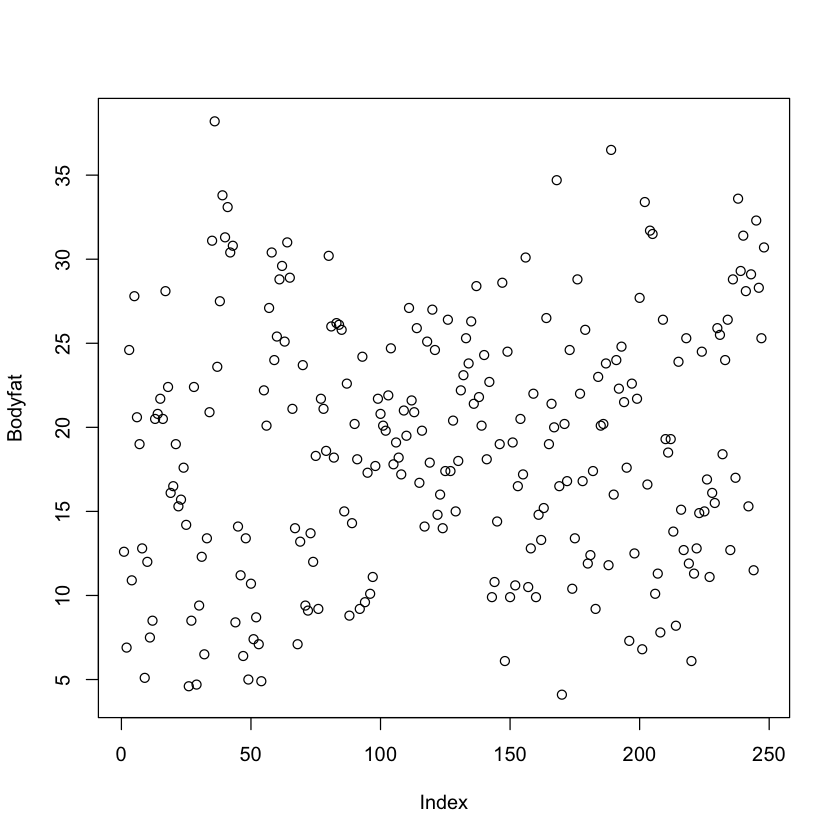

In [20]:
plot(bodyfat[,'BODYFAT'],ylab = 'Bodyfat')

In [21]:
summary(model <- lm(BODYFAT ~ ., data=bodyfat))


Call:
lm(formula = BODYFAT ~ ., data = bodyfat)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.265  -2.677  -0.132   2.844   9.408 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -22.97841   38.06962  -0.604  0.54670    
AGE           0.05546    0.03006   1.845  0.06635 .  
WEIGHT       -0.10236    0.10501  -0.975  0.33065    
HEIGHT        0.07439    0.53680   0.139  0.88991    
ADIPOSITY     0.20456    0.78509   0.261  0.79467    
NECK         -0.43032    0.21740  -1.979  0.04895 *  
CHEST        -0.02803    0.09966  -0.281  0.77876    
ABDOMEN       0.86303    0.08532  10.116  < 2e-16 ***
HIP          -0.21322    0.13752  -1.551  0.12238    
THIGH         0.22637    0.13722   1.650  0.10035    
KNEE          0.04639    0.23110   0.201  0.84108    
ANKLE         0.13970    0.20743   0.673  0.50130    
BICEPS        0.13465    0.16012   0.841  0.40123    
FOREARM       0.41032    0.18550   2.212  0.02794 *  
WRIST        -1.46192    0.49341

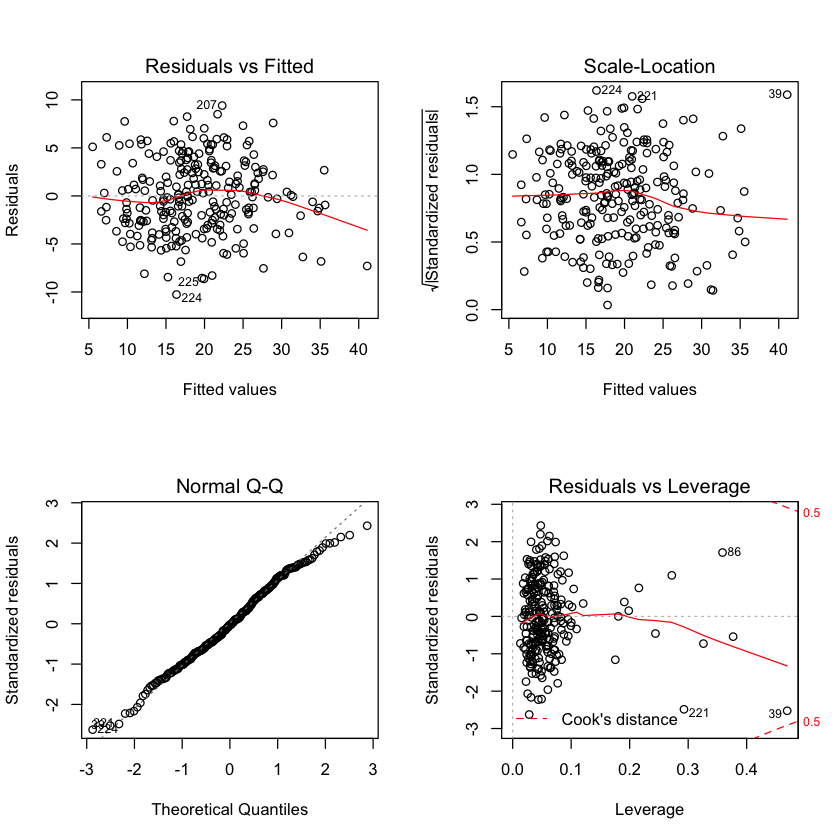

In [22]:
layout(matrix(1:4, ncol=2))
plot(model)

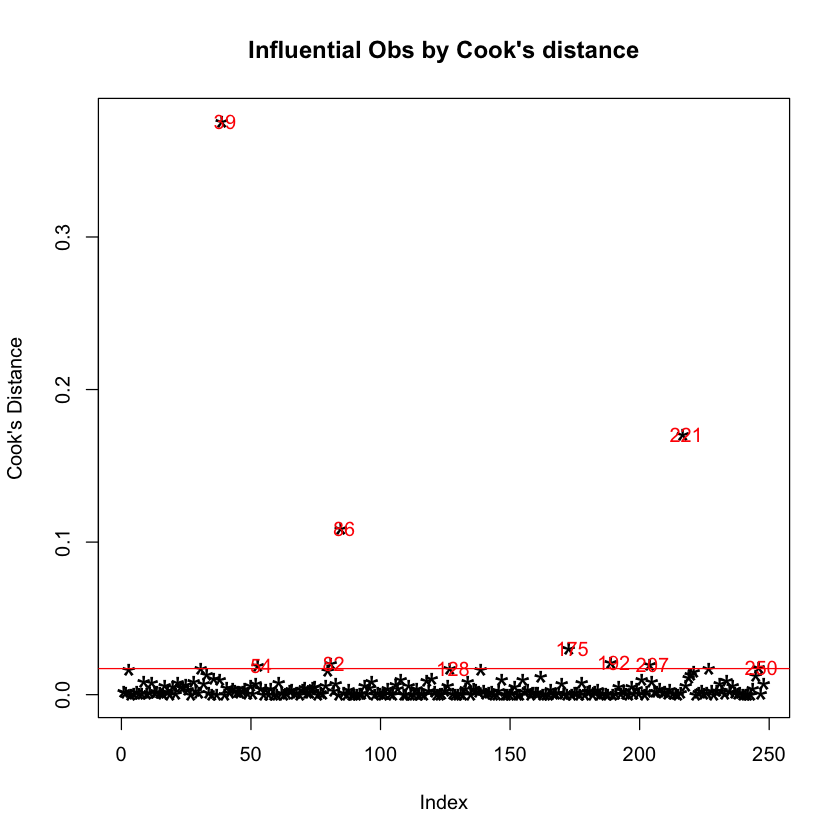

In [23]:
# Plot the Cook's Distance using the traditional 4/(n-p) criterion
cooksd <- cooks.distance(model)
sample_size <- nrow(bodyfat)
para_size <- ncol(bodyfat)-1
plot(cooksd, pch="*", cex=2, main="Influential Obs by Cook\'s distance", ylab = 'Cook\'s Distance')  # plot cook's distance
abline(h = 4/(sample_size-para_size), col="red")  # add cutoff line
text(x=1:length(cooksd)+1, y=cooksd, labels=ifelse(cooksd>4/(sample_size-para_size), names(cooksd),""), col="red")  # add labels

In [24]:
#influential <- as.numeric(names(cooksd)[(cooksd > (4/(sample_size-para_size)))])
influential <- c(39,86,221)
bodyfat_1 <- bodyfat[-influential,]
summary(model_1 <- lm(BODYFAT ~ ., data=bodyfat_1))


Call:
lm(formula = BODYFAT ~ ., data = bodyfat_1)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.1708  -2.8914  -0.1799   2.6760   9.0205 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6.75402   38.24060  -0.177  0.85996    
AGE          0.06433    0.02990   2.151  0.03249 *  
WEIGHT      -0.04625    0.10652  -0.434  0.66458    
HEIGHT      -0.09399    0.53208  -0.177  0.85994    
ADIPOSITY    0.21031    0.77078   0.273  0.78521    
NECK        -0.32723    0.21566  -1.517  0.13055    
CHEST       -0.10231    0.10396  -0.984  0.32610    
ABDOMEN      0.81725    0.08559   9.549  < 2e-16 ***
HIP         -0.16122    0.13633  -1.183  0.23819    
THIGH        0.16222    0.13724   1.182  0.23842    
KNEE        -0.03587    0.22825  -0.157  0.87526    
ANKLE        0.12302    0.20400   0.603  0.54707    
BICEPS       0.14263    0.15739   0.906  0.36578    
FOREARM      0.28133    0.19179   1.467  0.14377    
WRIST       -1.54093    0.49027  -3

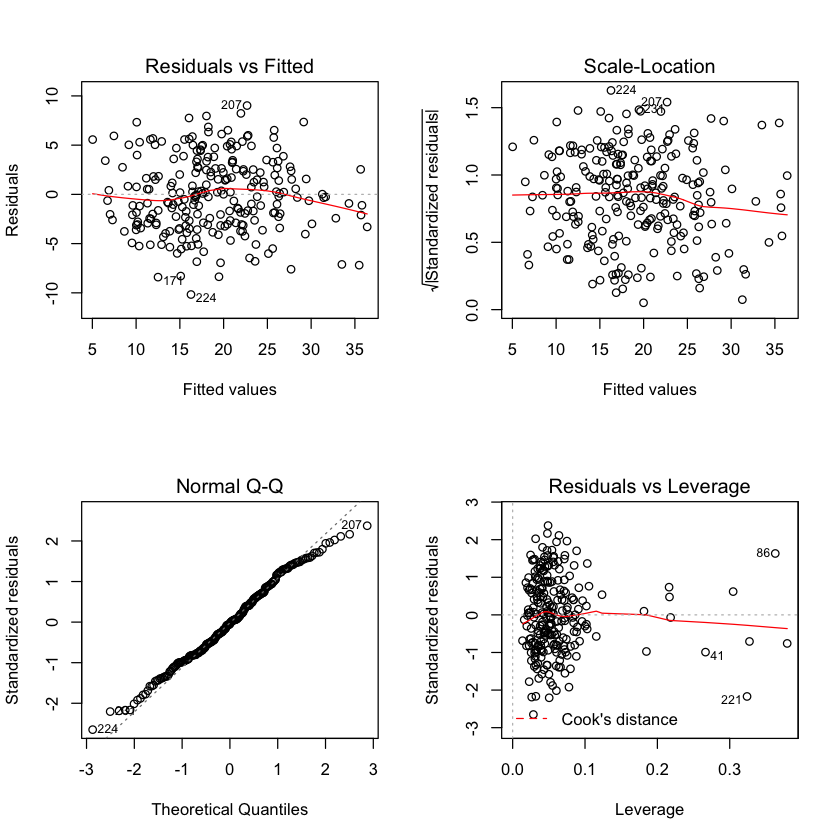

In [25]:
layout(matrix(1:4, ncol=2))
plot(model_1)

In [26]:
outlier <- c(221,224)
bodyfat_2 <- bodyfat_1[-outlier,]
summary(model_2 <- lm(BODYFAT ~ ., data=bodyfat_2))


Call:
lm(formula = BODYFAT ~ ., data = bodyfat_2)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.3660  -2.8417  -0.2088   2.5938   8.9283 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.48496   38.04522   0.013  0.98984    
AGE          0.06393    0.02990   2.138  0.03355 *  
WEIGHT      -0.03334    0.10580  -0.315  0.75295    
HEIGHT      -0.14173    0.52834  -0.268  0.78875    
ADIPOSITY    0.19187    0.76605   0.250  0.80245    
NECK        -0.35841    0.21449  -1.671  0.09609 .  
CHEST       -0.09740    0.10372  -0.939  0.34872    
ABDOMEN      0.81823    0.08504   9.622  < 2e-16 ***
HIP         -0.19353    0.13603  -1.423  0.15619    
THIGH        0.15381    0.13644   1.127  0.26083    
KNEE        -0.07292    0.22747  -0.321  0.74881    
ANKLE        0.12926    0.20237   0.639  0.52362    
BICEPS       0.16983    0.15651   1.085  0.27900    
FOREARM      0.27245    0.19060   1.429  0.15424    
WRIST       -1.57901    0.48799  -3

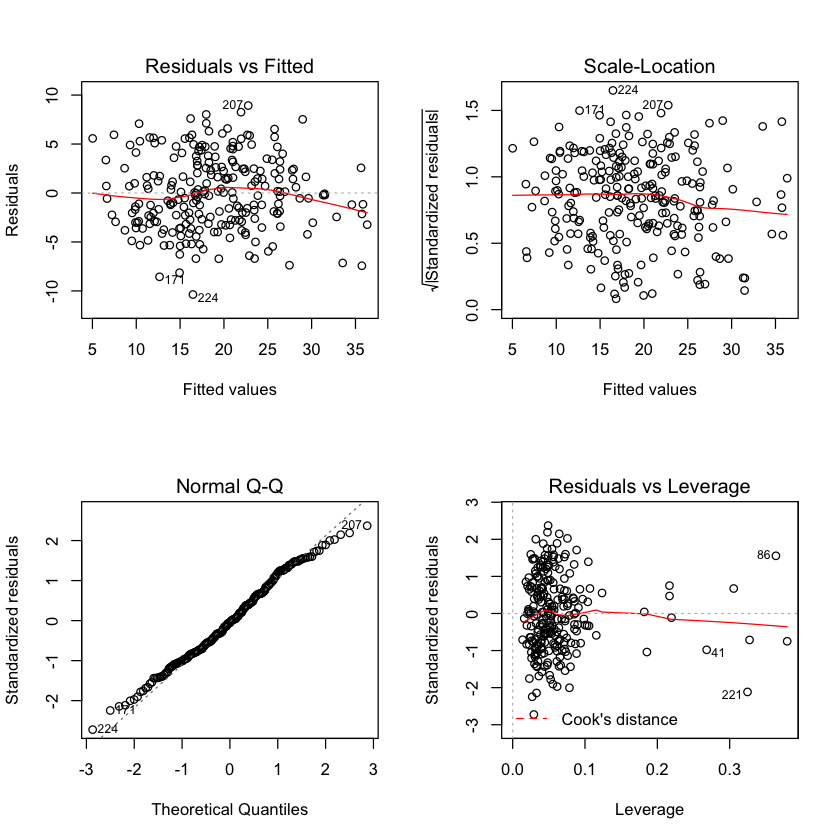

In [27]:
layout(matrix(1:4, ncol=2))
plot(model_2)

In [28]:
# Variable Selecation

In [29]:
# Eyeballing Varibales

In [30]:
summary(model_2)


Call:
lm(formula = BODYFAT ~ ., data = bodyfat_2)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.3660  -2.8417  -0.2088   2.5938   8.9283 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.48496   38.04522   0.013  0.98984    
AGE          0.06393    0.02990   2.138  0.03355 *  
WEIGHT      -0.03334    0.10580  -0.315  0.75295    
HEIGHT      -0.14173    0.52834  -0.268  0.78875    
ADIPOSITY    0.19187    0.76605   0.250  0.80245    
NECK        -0.35841    0.21449  -1.671  0.09609 .  
CHEST       -0.09740    0.10372  -0.939  0.34872    
ABDOMEN      0.81823    0.08504   9.622  < 2e-16 ***
HIP         -0.19353    0.13603  -1.423  0.15619    
THIGH        0.15381    0.13644   1.127  0.26083    
KNEE        -0.07292    0.22747  -0.321  0.74881    
ANKLE        0.12926    0.20237   0.639  0.52362    
BICEPS       0.16983    0.15651   1.085  0.27900    
FOREARM      0.27245    0.19060   1.429  0.15424    
WRIST       -1.57901    0.48799  -3

In [31]:
# Weight, Height, Adiposity and Knee all has a large p-value.

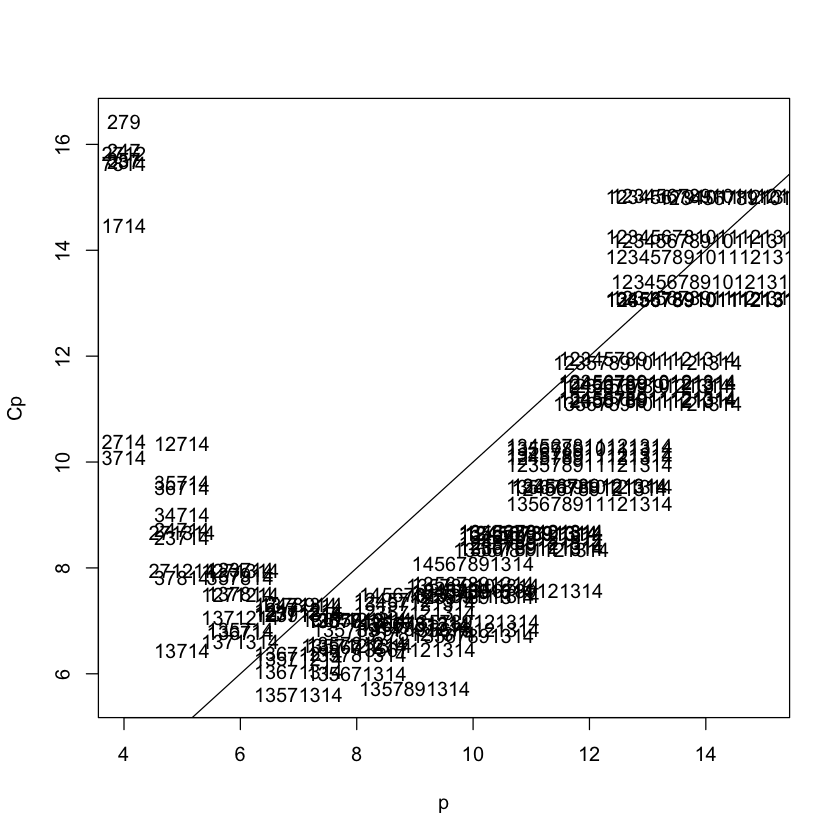

In [32]:
# Mallow’s Cp
X <- model.matrix(model_2)[,-1]
Y <- bodyfat_2[,1]

library(leaps)
library(faraway)

g <- leaps(X,Y)
Cpplot(g)

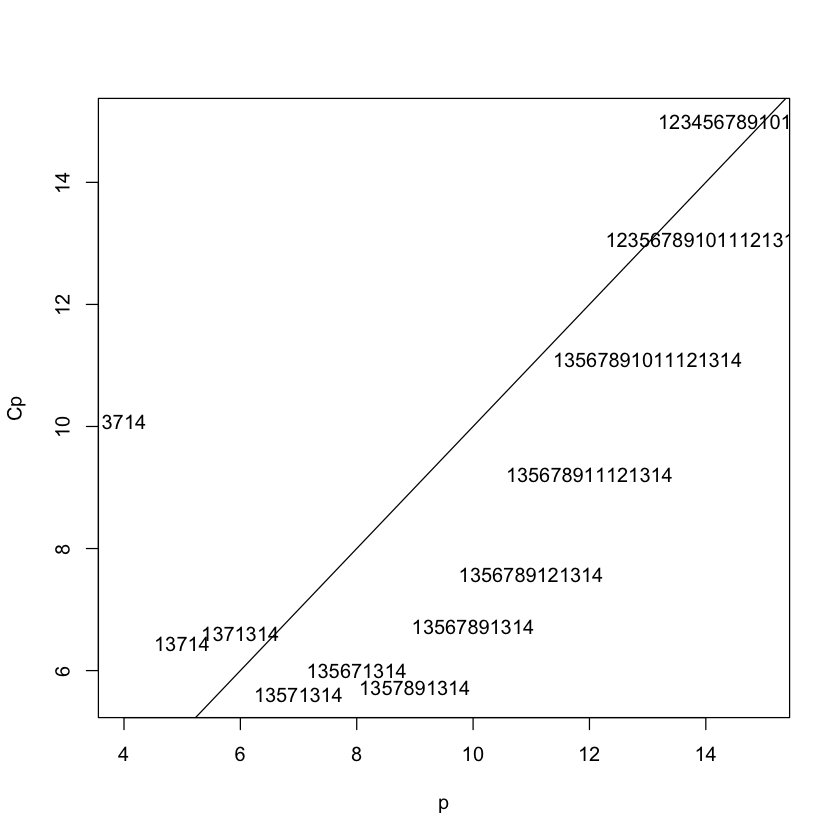

In [33]:
g <- leaps(X,Y, nbest=1)
Cpplot(g)

In [34]:
# (1,3,7,13,14) seems to be a good choice.
cp.choice <- c(1,3,7,13,14)+1 # column 1 responds to bodyfat.
bodyfat_cp <- bodyfat_2[,c(1,cp.choice)]
head(bodyfat_cp)

BODYFAT,AGE,HEIGHT,ABDOMEN,FOREARM,WRIST
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
12.6,23,67.75,85.2,27.4,17.1
6.9,22,72.25,83.0,28.9,18.2
24.6,22,66.25,87.9,25.2,16.6
10.9,26,72.25,86.4,29.4,18.2
27.8,24,71.25,100.0,27.7,17.7
20.6,24,74.75,94.4,30.6,18.8


In [35]:
summary(model_cp <- lm(BODYFAT ~ ., data=bodyfat_cp))


Call:
lm(formula = BODYFAT ~ ., data = bodyfat_cp)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.0150  -2.9134  -0.1895   2.7326   8.4010 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.04682    7.63012   0.924  0.35666    
AGE          0.06156    0.02303   2.673  0.00804 ** 
HEIGHT      -0.36112    0.11378  -3.174  0.00170 ** 
ABDOMEN      0.68138    0.03324  20.499  < 2e-16 ***
FOREARM      0.22534    0.16691   1.350  0.17828    
WRIST       -1.91114    0.41071  -4.653 5.44e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.867 on 237 degrees of freedom
Multiple R-squared:  0.7314,	Adjusted R-squared:  0.7258 
F-statistic: 129.1 on 5 and 237 DF,  p-value: < 2.2e-16


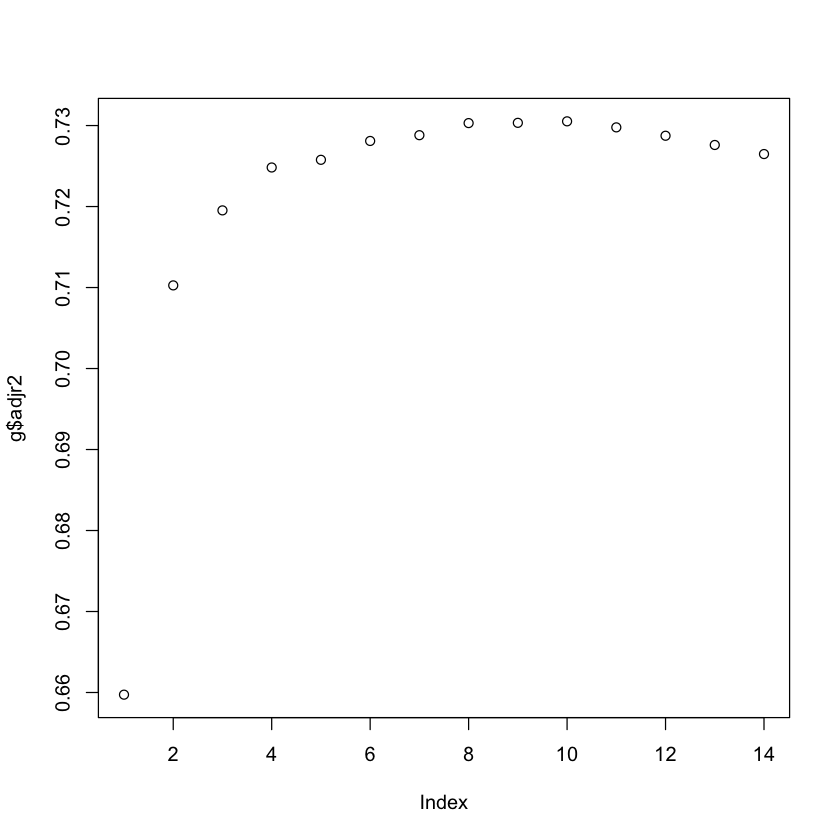

In [36]:
# Adjusted R^2
g <- leaps(X,Y, nbest=1, method="adjr2")
plot(g$adjr2)

In [37]:
(g$which)[which(g$adjr2 == max(g$adjr2)),]

1     2     3     4     5     6     7     8     9     A     B     C     D 
 TRUE FALSE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE  TRUE  TRUE 
    E 
 TRUE

In [38]:
r2.choice <- which((g$which)[which(g$adjr2 == max(g$adjr2)),]==T)+1 # column 1 responds to bodyfat.
bodyfat_r2 <- bodyfat_2[,c(1,r2.choice)]
head(bodyfat_r2)

BODYFAT,AGE,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,BICEPS,FOREARM,WRIST
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
12.6,23,67.75,36.2,93.1,85.2,94.5,59.0,32.0,27.4,17.1
6.9,22,72.25,38.5,93.6,83.0,98.7,58.7,30.5,28.9,18.2
24.6,22,66.25,34.0,95.8,87.9,99.2,59.6,28.8,25.2,16.6
10.9,26,72.25,37.4,101.8,86.4,101.2,60.1,32.4,29.4,18.2
27.8,24,71.25,34.4,97.3,100.0,101.9,63.2,32.2,27.7,17.7
20.6,24,74.75,39.0,104.5,94.4,107.8,66.0,35.7,30.6,18.8


In [39]:
summary(model_r2 <- lm(BODYFAT ~ ., data=bodyfat_r2))


Call:
lm(formula = BODYFAT ~ ., data = bodyfat_r2)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.2186  -2.8085  -0.2169   2.6478   8.8883 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 12.44973    8.01007   1.554 0.121486    
AGE          0.06113    0.02847   2.147 0.032840 *  
HEIGHT      -0.29544    0.11840  -2.495 0.013282 *  
NECK        -0.37678    0.20498  -1.838 0.067313 .  
CHEST       -0.09853    0.08247  -1.195 0.233417    
ABDOMEN      0.81264    0.07782  10.443  < 2e-16 ***
HIP         -0.20164    0.11982  -1.683 0.093757 .  
THIGH        0.14258    0.12633   1.129 0.260203    
BICEPS       0.16446    0.15268   1.077 0.282530    
FOREARM      0.27263    0.18541   1.470 0.142804    
WRIST       -1.52252    0.45186  -3.369 0.000882 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.833 on 232 degrees of freedom
Multiple R-squared:  0.7417,	Adjusted R-squared:  0.7305 
F-statisti

In [40]:
# AIC and BIC
library(MASS)
model_AIC_back <- stepAIC(model_2, direction="backward", k = 2)
summary(model_AIC_back)

Start:  AIC=671.18
BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + 
    ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + 
    WRIST

            Df Sum of Sq    RSS    AIC
- ADIPOSITY  1      0.94 3401.4 669.25
- HEIGHT     1      1.07 3401.5 669.26
- WEIGHT     1      1.48 3401.9 669.29
- KNEE       1      1.53 3402.0 669.29
- ANKLE      1      6.09 3406.5 669.61
- CHEST      1     13.15 3413.6 670.12
- BICEPS     1     17.56 3418.0 670.43
- THIGH      1     18.95 3419.4 670.53
<none>                   3400.4 671.18
- HIP        1     30.19 3430.6 671.33
- FOREARM    1     30.48 3430.9 671.35
- NECK       1     41.65 3442.1 672.14
- AGE        1     68.20 3468.6 674.00
- WRIST      1    156.15 3556.6 680.09
- ABDOMEN    1   1380.77 4781.2 751.99

Step:  AIC=669.25
BODYFAT ~ AGE + WEIGHT + HEIGHT + NECK + CHEST + ABDOMEN + HIP + 
    THIGH + KNEE + ANKLE + BICEPS + FOREARM + WRIST

          Df Sum of Sq    RSS    AIC
- WEIGHT   1      0.55 3401.9 667.29
- KNEE   


Call:
lm(formula = BODYFAT ~ AGE + HEIGHT + NECK + ABDOMEN + HIP + 
    THIGH + FOREARM + WRIST, data = bodyfat_2)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.2524  -2.8231  -0.1836   2.7729   9.1861 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.15993    7.85537   1.293 0.197157    
AGE          0.06365    0.02842   2.240 0.026053 *  
HEIGHT      -0.28641    0.11821  -2.423 0.016158 *  
NECK        -0.39870    0.19824  -2.011 0.045456 *  
ABDOMEN      0.75987    0.06339  11.988  < 2e-16 ***
HIP         -0.21695    0.11897  -1.824 0.069485 .  
THIGH        0.19628    0.12020   1.633 0.103822    
FOREARM      0.30913    0.17432   1.773 0.077465 .  
WRIST       -1.52677    0.44929  -3.398 0.000797 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.835 on 234 degrees of freedom
Multiple R-squared:  0.7392,	Adjusted R-squared:  0.7303 
F-statistic: 82.91 on 8 and 234 DF,  p-value: < 2.2e

In [41]:
model_BIC_back <- stepAIC(model_2, direction="backward", k = nrow(bodyfat_2))
summary(model_BIC_back)

Start:  AIC=4286.18
BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + 
    ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + 
    WRIST

            Df Sum of Sq    RSS    AIC
- ADIPOSITY  1      0.94 3401.4 4043.2
- HEIGHT     1      1.07 3401.5 4043.3
- WEIGHT     1      1.48 3401.9 4043.3
- KNEE       1      1.53 3402.0 4043.3
- ANKLE      1      6.09 3406.5 4043.6
- CHEST      1     13.15 3413.6 4044.1
- BICEPS     1     17.56 3418.0 4044.4
- THIGH      1     18.95 3419.4 4044.5
- HIP        1     30.19 3430.6 4045.3
- FOREARM    1     30.48 3430.9 4045.3
- NECK       1     41.65 3442.1 4046.1
- AGE        1     68.20 3468.6 4048.0
- WRIST      1    156.15 3556.6 4054.1
- ABDOMEN    1   1380.77 4781.2 4126.0
<none>                   3400.4 4286.2

Step:  AIC=4043.25
BODYFAT ~ AGE + WEIGHT + HEIGHT + NECK + CHEST + ABDOMEN + HIP + 
    THIGH + KNEE + ANKLE + BICEPS + FOREARM + WRIST

          Df Sum of Sq    RSS    AIC
- WEIGHT   1      0.55 3401.9 3800.3
- KNEE 


Call:
lm(formula = BODYFAT ~ ABDOMEN, data = bodyfat_2)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.1747  -3.3252   0.0662   2.8837  11.8404 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -36.57684    2.57430  -14.21   <2e-16 ***
ABDOMEN       0.60103    0.02772   21.68   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.307 on 241 degrees of freedom
Multiple R-squared:  0.6611,	Adjusted R-squared:  0.6597 
F-statistic: 470.2 on 1 and 241 DF,  p-value: < 2.2e-16


In [42]:
model_AIC_for <- stepAIC(model_2, direction="forward", k = 2)
summary(model_AIC_for)

Start:  AIC=671.18
BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + 
    ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + 
    WRIST




Call:
lm(formula = BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + 
    CHEST + ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + 
    WRIST, data = bodyfat_2)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.3660  -2.8417  -0.2088   2.5938   8.9283 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.48496   38.04522   0.013  0.98984    
AGE          0.06393    0.02990   2.138  0.03355 *  
WEIGHT      -0.03334    0.10580  -0.315  0.75295    
HEIGHT      -0.14173    0.52834  -0.268  0.78875    
ADIPOSITY    0.19187    0.76605   0.250  0.80245    
NECK        -0.35841    0.21449  -1.671  0.09609 .  
CHEST       -0.09740    0.10372  -0.939  0.34872    
ABDOMEN      0.81823    0.08504   9.622  < 2e-16 ***
HIP         -0.19353    0.13603  -1.423  0.15619    
THIGH        0.15381    0.13644   1.127  0.26083    
KNEE        -0.07292    0.22747  -0.321  0.74881    
ANKLE        0.12926    0.20237   0.639  0.52362    
BICEPS       0.169

In [43]:
model_BIC_for <- stepAIC(model_2, direction="forward", k = nrow(bodyfat_2))
summary(model_BIC_for)

Start:  AIC=4286.18
BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + 
    ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + 
    WRIST




Call:
lm(formula = BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + 
    CHEST + ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + 
    WRIST, data = bodyfat_2)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.3660  -2.8417  -0.2088   2.5938   8.9283 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.48496   38.04522   0.013  0.98984    
AGE          0.06393    0.02990   2.138  0.03355 *  
WEIGHT      -0.03334    0.10580  -0.315  0.75295    
HEIGHT      -0.14173    0.52834  -0.268  0.78875    
ADIPOSITY    0.19187    0.76605   0.250  0.80245    
NECK        -0.35841    0.21449  -1.671  0.09609 .  
CHEST       -0.09740    0.10372  -0.939  0.34872    
ABDOMEN      0.81823    0.08504   9.622  < 2e-16 ***
HIP         -0.19353    0.13603  -1.423  0.15619    
THIGH        0.15381    0.13644   1.127  0.26083    
KNEE        -0.07292    0.22747  -0.321  0.74881    
ANKLE        0.12926    0.20237   0.639  0.52362    
BICEPS       0.169

In [44]:
model_AIC_step <- stepAIC(model_2, direction="both", k = 2)
summary(model_AIC_step)

Start:  AIC=671.18
BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + 
    ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + 
    WRIST

            Df Sum of Sq    RSS    AIC
- ADIPOSITY  1      0.94 3401.4 669.25
- HEIGHT     1      1.07 3401.5 669.26
- WEIGHT     1      1.48 3401.9 669.29
- KNEE       1      1.53 3402.0 669.29
- ANKLE      1      6.09 3406.5 669.61
- CHEST      1     13.15 3413.6 670.12
- BICEPS     1     17.56 3418.0 670.43
- THIGH      1     18.95 3419.4 670.53
<none>                   3400.4 671.18
- HIP        1     30.19 3430.6 671.33
- FOREARM    1     30.48 3430.9 671.35
- NECK       1     41.65 3442.1 672.14
- AGE        1     68.20 3468.6 674.00
- WRIST      1    156.15 3556.6 680.09
- ABDOMEN    1   1380.77 4781.2 751.99

Step:  AIC=669.25
BODYFAT ~ AGE + WEIGHT + HEIGHT + NECK + CHEST + ABDOMEN + HIP + 
    THIGH + KNEE + ANKLE + BICEPS + FOREARM + WRIST

            Df Sum of Sq    RSS    AIC
- WEIGHT     1      0.55 3401.9 667.29
- KNE


Call:
lm(formula = BODYFAT ~ AGE + HEIGHT + NECK + ABDOMEN + HIP + 
    THIGH + FOREARM + WRIST, data = bodyfat_2)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.2524  -2.8231  -0.1836   2.7729   9.1861 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.15993    7.85537   1.293 0.197157    
AGE          0.06365    0.02842   2.240 0.026053 *  
HEIGHT      -0.28641    0.11821  -2.423 0.016158 *  
NECK        -0.39870    0.19824  -2.011 0.045456 *  
ABDOMEN      0.75987    0.06339  11.988  < 2e-16 ***
HIP         -0.21695    0.11897  -1.824 0.069485 .  
THIGH        0.19628    0.12020   1.633 0.103822    
FOREARM      0.30913    0.17432   1.773 0.077465 .  
WRIST       -1.52677    0.44929  -3.398 0.000797 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.835 on 234 degrees of freedom
Multiple R-squared:  0.7392,	Adjusted R-squared:  0.7303 
F-statistic: 82.91 on 8 and 234 DF,  p-value: < 2.2e

In [45]:
model_BIC_step <- stepAIC(model_2, direction="both", k = nrow(bodyfat_2))
summary(model_BIC_step)

Start:  AIC=4286.18
BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + 
    ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + 
    WRIST

            Df Sum of Sq    RSS    AIC
- ADIPOSITY  1      0.94 3401.4 4043.2
- HEIGHT     1      1.07 3401.5 4043.3
- WEIGHT     1      1.48 3401.9 4043.3
- KNEE       1      1.53 3402.0 4043.3
- ANKLE      1      6.09 3406.5 4043.6
- CHEST      1     13.15 3413.6 4044.1
- BICEPS     1     17.56 3418.0 4044.4
- THIGH      1     18.95 3419.4 4044.5
- HIP        1     30.19 3430.6 4045.3
- FOREARM    1     30.48 3430.9 4045.3
- NECK       1     41.65 3442.1 4046.1
- AGE        1     68.20 3468.6 4048.0
- WRIST      1    156.15 3556.6 4054.1
- ABDOMEN    1   1380.77 4781.2 4126.0
<none>                   3400.4 4286.2

Step:  AIC=4043.25
BODYFAT ~ AGE + WEIGHT + HEIGHT + NECK + CHEST + ABDOMEN + HIP + 
    THIGH + KNEE + ANKLE + BICEPS + FOREARM + WRIST

            Df Sum of Sq    RSS    AIC
- WEIGHT     1      0.55 3401.9 3800.3
- K


Step:  AIC=1403.69
BODYFAT ~ HEIGHT + ABDOMEN

            Df Sum of Sq     RSS    AIC
- HEIGHT     1     568.3  4471.5 1193.7
<none>                    3903.2 1403.7
- ABDOMEN    1    9270.9 13174.0 1456.3
+ WRIST      1     248.0  3655.1 1630.7
+ WEIGHT     1     164.6  3738.6 1636.2
+ NECK       1     164.1  3739.1 1636.2
+ ADIPOSITY  1     150.5  3752.7 1637.1
+ CHEST      1     101.7  3801.5 1640.3
+ HIP        1      95.4  3807.8 1640.7
+ KNEE       1      30.8  3872.3 1644.8
+ AGE        1      30.0  3873.1 1644.8
+ ANKLE      1      23.3  3879.9 1645.2
+ THIGH      1      20.7  3882.4 1645.4
+ FOREARM    1      11.8  3891.3 1646.0
+ BICEPS     1      11.4  3891.8 1646.0

Step:  AIC=1193.72
BODYFAT ~ ABDOMEN

            Df Sum of Sq     RSS    AIC
<none>                    4471.5 1193.7
- ABDOMEN    1    8724.1 13195.6 1213.7
+ WEIGHT     1     679.9  3791.6 1396.6
+ HEIGHT     1     568.3  3903.2 1403.7
+ WRIST      1     535.8  3935.6 1405.7
+ HIP        1     383.5  4088.0 


Call:
lm(formula = BODYFAT ~ ABDOMEN, data = bodyfat_2)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.1747  -3.3252   0.0662   2.8837  11.8404 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -36.57684    2.57430  -14.21   <2e-16 ***
ABDOMEN       0.60103    0.02772   21.68   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.307 on 241 degrees of freedom
Multiple R-squared:  0.6611,	Adjusted R-squared:  0.6597 
F-statistic: 470.2 on 1 and 241 DF,  p-value: < 2.2e-16
